In [5]:
#### Sonali Sabnam ADTA 5550 Assignment 3 – MLPs on Iris with Keras Part III
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

#fix random seed
random_seed=7
np.random.seed(random_seed)



import locale

## load data

filename='Iris.csv'

df=pd.read_csv(filename)
df.describe()

## Preprocess Data

# finding missing data
print(df.isnull().sum())




Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# EDA
print(df.shape)

(150, 6)


In [8]:
# Get the data type for all the variables
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [10]:
# print the forst 5 records

print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [11]:
# summary statistics
print(df.describe(include=None))



               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [12]:
# class distribution
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


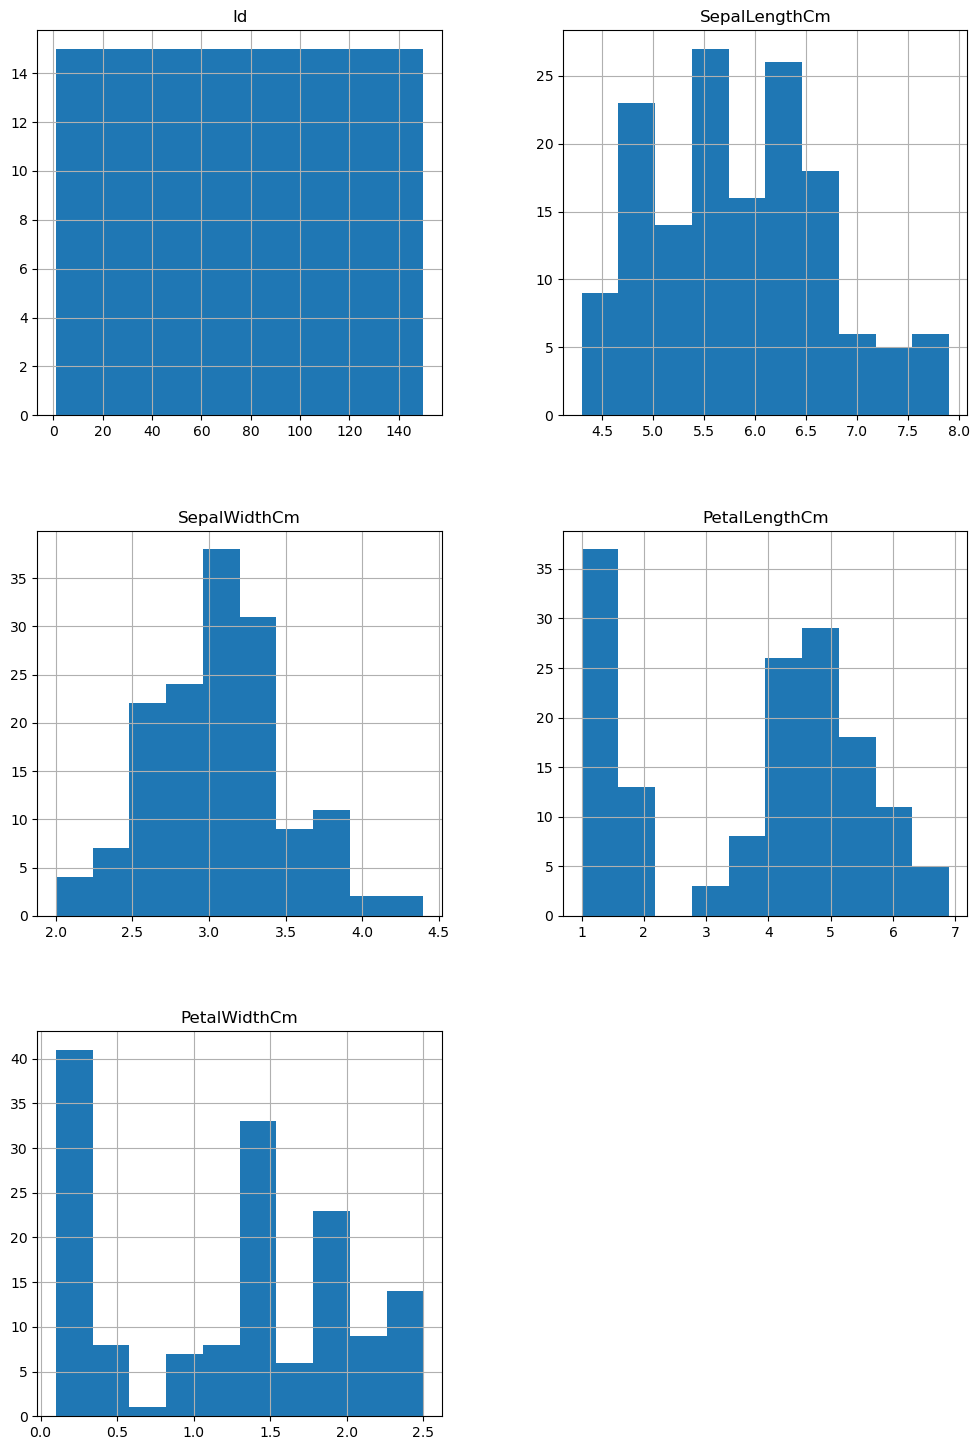

In [13]:
# visualize the data
# histogram
df.hist(figsize=(12,18))
pyplot.show()

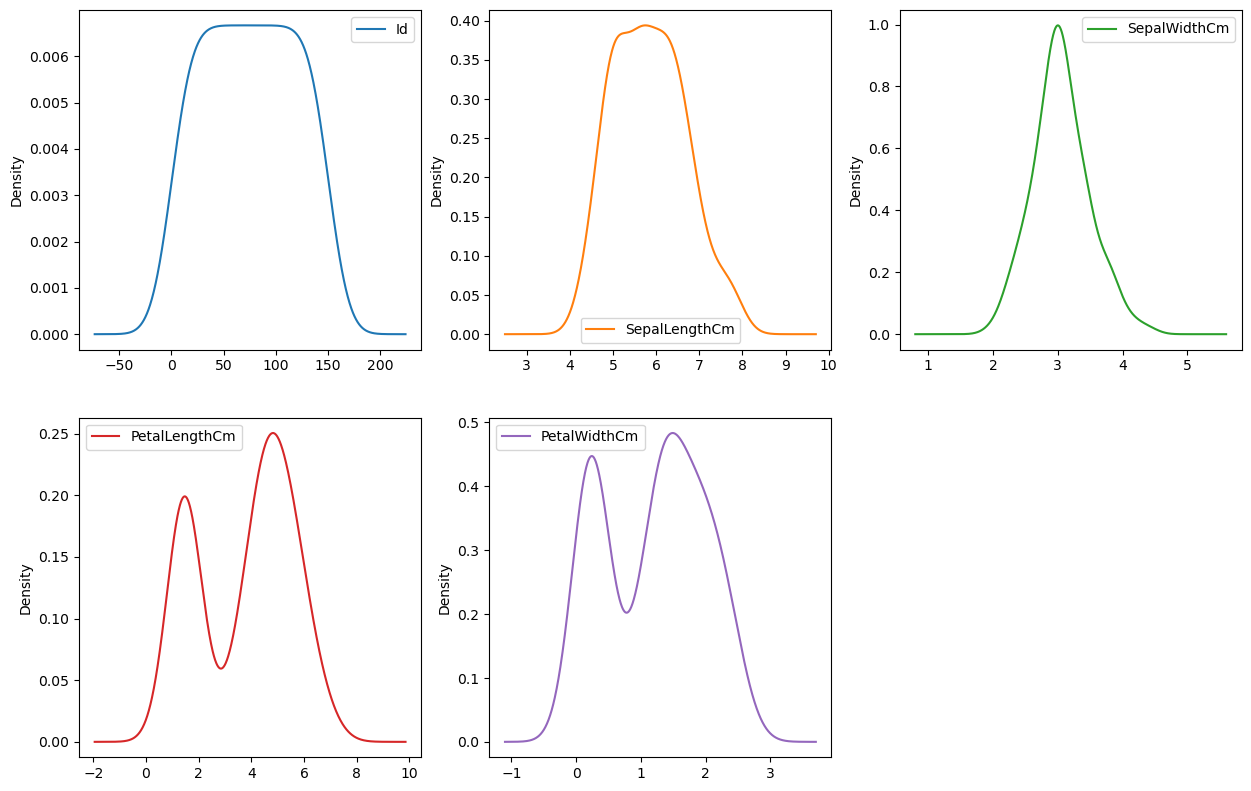

In [17]:
# Density plot
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, figsize=(15,15))
pyplot.show()

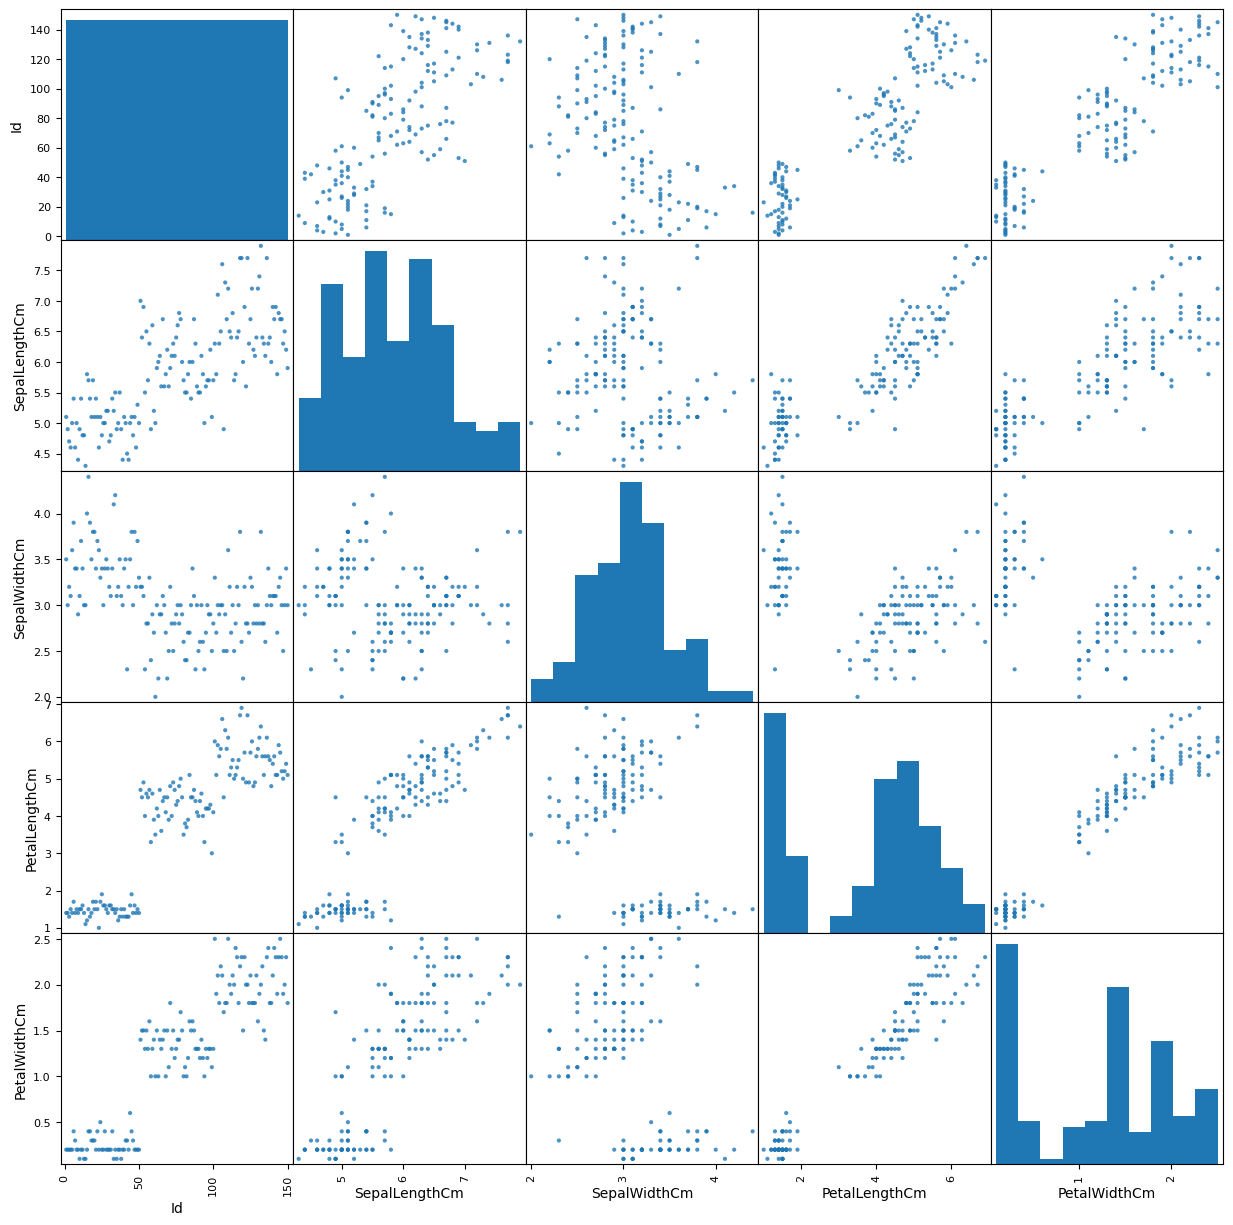

In [18]:
# scatter plot matrix
scatter_matrix(df, alpha=0.8, figsize=(15,15))
pyplot.show()

In [20]:
## seperate the datset into input and output array
# store df into numpy array
array=df.values
# Seperate the array into input and output components by slicing
# input colums with indices 1 2 3 4
X=array[:,1:5]
Y=array[:,5]

In [21]:
#Split input and output array into training and testing datasets
# training=67%, testing=33%, 
test_size=0.33

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=test_size, random_state=random_seed)


In [74]:
# encode class values as intgers
encoder_train=LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train=encoder_train.transform(Y_train)
print("encoded_Y_train: ", encoded_Y_train)

# convert integer into one hot encoding
onehot_Y_train=np_utils.to_categorical(encoded_Y_train)
print("onehot_Y_train: ", onehot_Y_train)

# encode class values as integer
encoder_test=LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test=encoder_test.transform(Y_test)
print("encoded_Y_test: ", encoded_Y_test)

# convert integer into onehot encoding
onehot_Y_test=np_utils.to_categorical(encoded_Y_test)
print("onehot_Y_test: ", onehot_Y_test)





encoded_Y_train:  [0 0 2 0 2 1 1 1 0 0 0 1 2 1 1 0 2 0 0 2 2 0 2 0 1 2 1 0 1 0 2 2 1 0 0 1 2
 0 2 2 1 0 1 0 2 2 0 0 2 1 2 2 1 0 0 2 0 0 1 2 2 1 1 0 2 0 0 1 1 2 0 1 1 2
 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]
onehot_Y_train:  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 

In [68]:
# Build MLP fully connected neural network
# define a function to create a baseline model

def baseline_model():
    model=Sequential()
    model.add(Dense(8, input_dim=4, activation='relu')) # first hidden layer
    model.add(Dense(10, activation='relu'))  # second hidden layer
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'] )
    return model

In [69]:
# create a model
model=baseline_model()



In [70]:
# train the model
model.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)

Epoch 1/150
100/100 [==============================] - 1s 7ms/step - loss: 1.0001 - accuracy: 0.3600
Epoch 2/150
100/100 [==============================] - 0s 336us/step - loss: 0.9495 - accuracy: 0.3600
Epoch 3/150
100/100 [==============================] - 0s 344us/step - loss: 0.9078 - accuracy: 0.3600
Epoch 4/150
100/100 [==============================] - 0s 342us/step - loss: 0.8690 - accuracy: 0.4100
Epoch 5/150
100/100 [==============================] - 0s 342us/step - loss: 0.8342 - accuracy: 0.5100
Epoch 6/150
100/100 [==============================] - 0s 326us/step - loss: 0.8052 - accuracy: 0.6400
Epoch 7/150
100/100 [==============================] - 0s 322us/step - loss: 0.7838 - accuracy: 0.6600
Epoch 8/150
100/100 [==============================] - 0s 341us/step - loss: 0.7668 - accuracy: 0.6800
Epoch 9/150
100/100 [==============================] - 0s 337us/step - loss: 0.7523 - accuracy: 0.6800
Epoch 10/150
100/100 [==============================] - 0s 314us/step - los

In [71]:
# evaluate the model with k-fold cross validation
# create Keras classifier
evaluator=KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

# use K-fold cross validation to evaluate the model
kfold=KFold(n_splits=10, shuffle=True, random_state=random_seed)

# evaluate the model
results=cross_val_score(evaluator, X_test, onehot_Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/200
45/45 [==============================] - 1s 15ms/step - loss: 1.2709 - accuracy: 0.3556
Epoch 2/200
45/45 [==============================] - 0s 628us/step - loss: 1.2333 - accuracy: 0.3333
Epoch 3/200
45/45 [==============================] - 0s 623us/step - loss: 1.1997 - accuracy: 0.4000
Epoch 4/200
45/45 [==============================] - 0s 673us/step - loss: 1.1764 - accuracy: 0.3778
Epoch 5/200
45/45 [==============================] - 0s 648us/step - loss: 1.1480 - accuracy: 0.4667
Epoch 6/200
45/45 [==============================] - 0s 680us/step - loss: 1.1309 - accuracy: 0.4444
Epoch 7/200
45/45 [==============================] - 0s 646us/step - loss: 1.1105 - accuracy: 0.4889
Epoch 8/200
45/45 [==============================] - 0s 686us/step - loss: 1.0983 - accuracy: 0.5111
Epoch 9/200
45/45 [==============================] - 0s 678us/step - loss: 1.0863 - accuracy: 0.5333
Epoch 10/200
45/45 [==============================] - 0s 740us/step - loss: 1.0764 - accurac

In [73]:
# evaluate the model
scores=model.evaluate(X_test, onehot_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 144us/step

accuracy: 100.00%
